In [74]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import sklearn
import random
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt

## Reading data

#### Tongji hospital

In [75]:
Tongji_375_data = pd.read_csv("data/Tongji_375_CN.csv")

In [76]:
Tongji_375_data = Tongji_375_data.dropna()

In [77]:
y_tongji = np.array(Tongji_375_data['outcome'])
X_tongji = Tongji_375_data.drop(['id', 'admission', 'discharge', 'LDH_first', 'hsCRP_first', 'lymphocytes_first', 'outcome'], axis = 1)

#### Remaining hospitals

In [78]:
Tongji_110_data = pd.read_csv("data/Tongji_110_CN.csv")
St_Antonius_data = pd.read_csv("data/St_Antonius_NL.csv")
Outcomerea_FR_data = pd.read_csv("data/Outcomerea_FR.csv")
Northwell_US_data = pd.read_csv("data/Northwell_US.csv")

In [79]:
Northwell_US_data = Northwell_US_data.loc[random.sample(range(0,1038), 500),:]

In [80]:
combined_data = pd.concat([Tongji_375_data, Tongji_110_data,
                           St_Antonius_data, Outcomerea_FR_data,
                           Northwell_US_data]).reset_index()

In [81]:
combined_data = combined_data.drop(['admission', 'discharge'], axis=1).dropna()

In [82]:
y_combined = np.array(combined_data['outcome'])
X_combined = combined_data.drop(['id','index', 'LDH_first', 'hsCRP_first', 'lymphocytes_first', 'outcome'], axis = 1)

#### Hospitals without Tongji

In [83]:
data_without_tongji = pd.concat([St_Antonius_data, Outcomerea_FR_data,
                           Northwell_US_data]).reset_index()

In [84]:
data_without_tongji = data_without_tongji.drop(['admission', 'discharge'], axis=1).dropna()

In [85]:
y_w_t = np.array(data_without_tongji['outcome'])
X_w_t = data_without_tongji.drop(['id','index', 'LDH_first', 'hsCRP_first', 'lymphocytes_first', 'outcome'], axis = 1)

### Defining functions

In [71]:
def svm_testing(X,y, text):
    svm = SVC()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    svm.fit(X_train, y_train)
    y_test_score = svm.decision_function(X_test)
    y_train_score = svm.decision_function(X_train)
    X_train_val=pd.concat((X_train,X_test))
    y_train_val=np.concatenate((y_train,y_test), axis=0)
    train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train, y_train_score)
    test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test, y_test_score)
    #Drawing ROC curve
    plt.grid()
    plt.plot(train_fpr,train_tpr, label = "Train ROC")
    plt.plot(test_fpr,test_tpr, label = "Test ROC")
    plt.legend()
    plt.title("ROC plot for %s"%text)
    plt.xlabel("False positive")
    plt.ylabel("True positive")
    plt.rcParams["figure.figsize"] = (10,10)
    print("AUC for train ROC is %s"%metrics.auc(train_fpr, train_tpr))
    print("AUC for test ROC is %s"%metrics.auc(test_fpr, test_tpr))
    
    fig = metrics.plot_confusion_matrix(svm,X_test,y_test,display_labels=['Survived', 'Died'],
                                 cmap=plt.cm.Blues)
    fig.ax_.set_title("Confusion matrix for %s" %text)
    
    #Crossvalidations
    cross_acc = cross_val_score(svm, X_train_val, y_train_val, scoring='accuracy', cv = 20)
    cross_pre = cross_val_score(svm, X_train_val, y_train_val, scoring='precision', cv = 20)
    cross_rec = cross_val_score(svm, X_train_val, y_train_val, scoring='recall', cv = 20)
    cross = pd.DataFrame({'Accuracy' : cross_acc,
                          'Precision' : cross_pre,
                         'Recall':cross_rec})
    cross = pd.melt(cross)
    return cross
    

## SVM testing for Tongji hospital

AUC for train ROC is 0.9914742212674543
AUC for test ROC is 0.9841327082582041


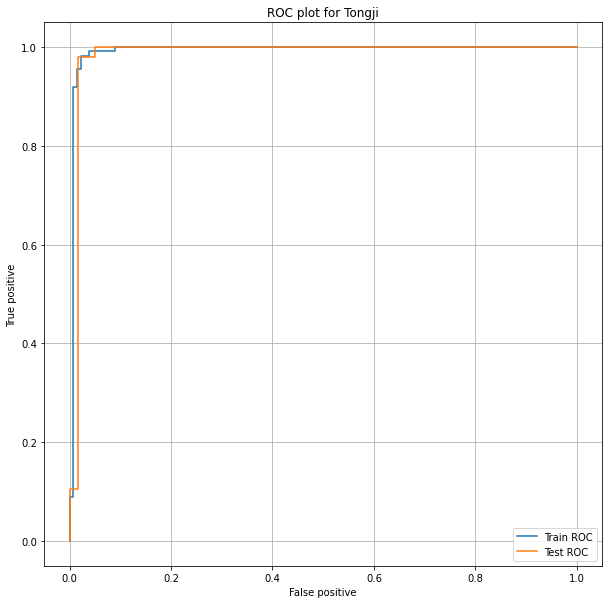

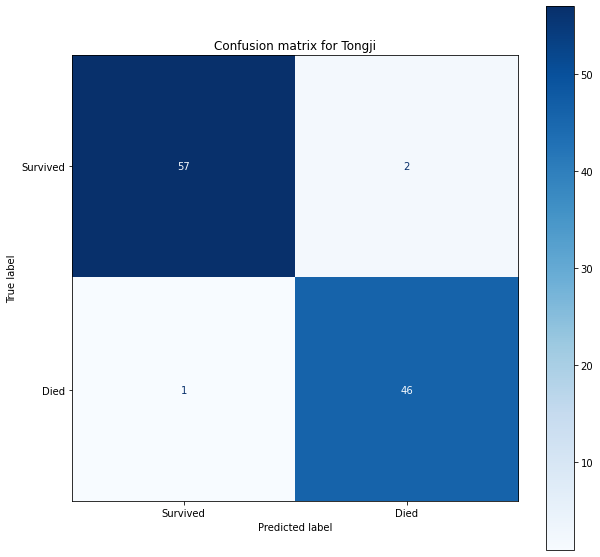

In [86]:
cross_tongji = svm_testing(X_tongji,y_tongji, "Tongji")

## SVM testing for combined data

AUC for train ROC is 0.8651854641310487
AUC for test ROC is 0.8400671227571963


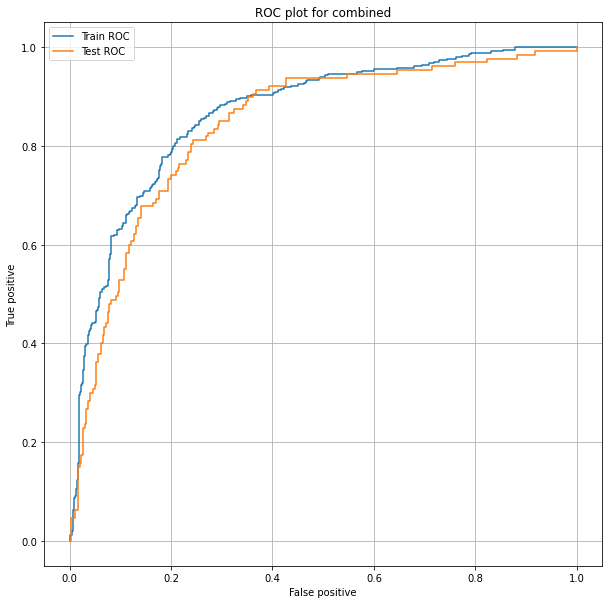

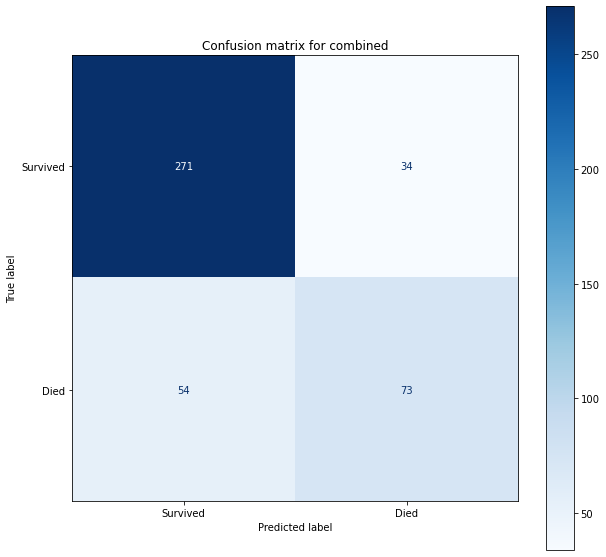

In [87]:
cross_combined = svm_testing(X_combined,y_combined, "combined")

# SVM testing for data without Tongji

AUC for train ROC is 0.7809166936005172
AUC for test ROC is 0.7682279092225978


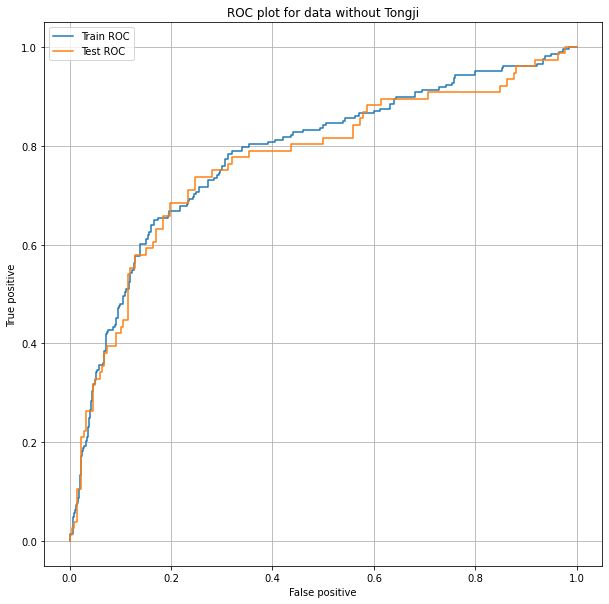

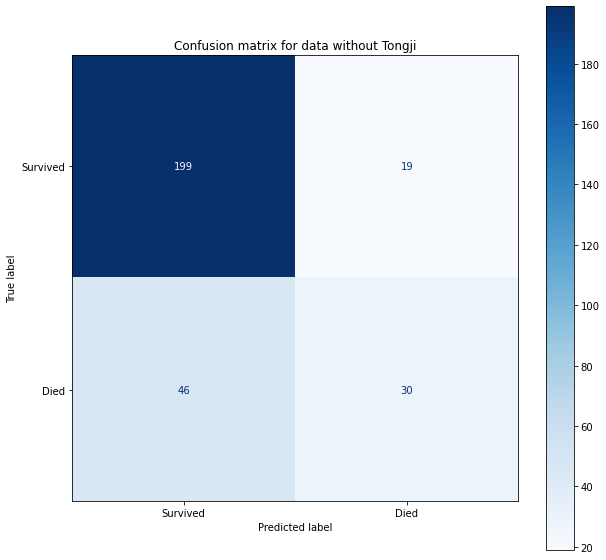

In [88]:
cross_w_t = svm_testing(X_w_t,y_w_t, "data without Tongji")

In [89]:
cross_tongji['type'] = ['Tongji'] * 60
cross_combined['type'] = ['Combined'] * 60
cross_w_t['type'] = ['Excluding_Tongji'] * 60

In [90]:
crossvalidations = pd.concat((cross_tongji,cross_combined,cross_w_t))
crossvalidations = crossvalidations.rename(columns={'variable':'Scoring'})

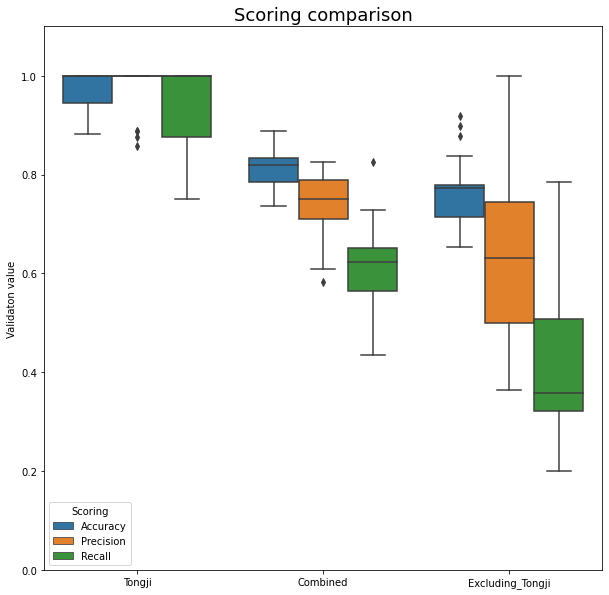

In [91]:
ax = sns.boxplot(data = crossvalidations, 
                 x = crossvalidations.type, y = crossvalidations.value, hue = crossvalidations.Scoring
                  )
ax.set(ylim = (0,1.1))
matplotlib.rcParams['figure.figsize'] = [10,12]
matplotlib.rcParams.update({'font.size': 15})
plt.title("Scoring comparison")
plt.ylabel("Validaton value")
plt.xlabel("")

plt.show()

# SVM trained on Tongji 375, but tested on other hospitals

In [23]:
Tongji_110_data = Tongji_110_data.dropna()

In [38]:
Outcomerea_FR_data = Outcomerea_FR_data.dropna()

In [25]:
y_t = np.array(Tongji_375_data['outcome'])
X_t = Tongji_375_data.drop(['id', 'admission', 'discharge', 'LDH_first', 'hsCRP_first', 'lymphocytes_first', 'outcome'], axis = 1)

In [26]:
y_te = np.array(Tongji_110_data['outcome'])
X_te = Tongji_110_data.drop(['id', 'admission', 'discharge', 'LDH_first', 'hsCRP_first', 'lymphocytes_first', 'outcome'], axis = 1)

In [27]:
y_te_fr = np.array(Outcomerea_FR_data['outcome'])
X_te_fr = Outcomerea_FR_data.drop(['id', 'admission', 'discharge', 'LDH_first', 'hsCRP_first', 'lymphocytes_first', 'outcome'], axis = 1)

In [28]:
svm = SVC()

In [29]:
svm.fit(X_t, y_t)
y_test_score = svm.decision_function(X_te)
y_train_score = svm.decision_function(X_t)
y_test_score_fr = svm.decision_function(X_te_fr)

AUC for train ROC is 0.9892557651991615
AUC tested on Tongji is 0.9904837430610627
AUC tested on Outcomerea is 0.6901315789473684


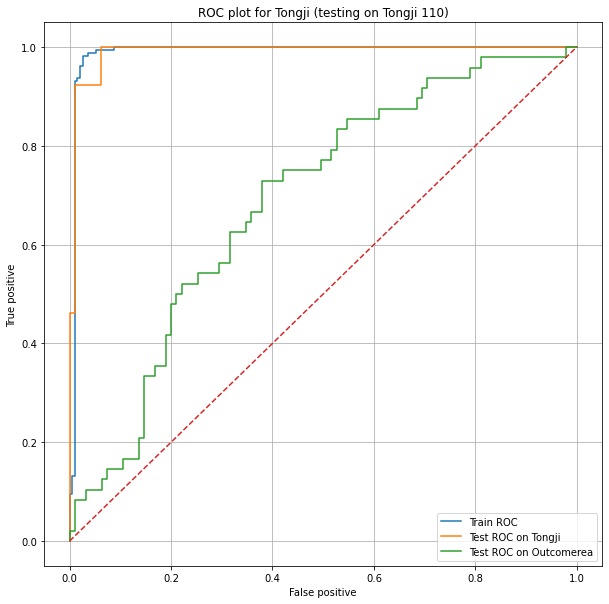

In [33]:
train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_t, y_train_score)
test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_te, y_test_score)
test_fpr_fr, test_tpr_fr, te_thresholds = metrics.roc_curve(y_te_fr, y_test_score_fr)
    #Drawing ROC curve
plt.grid()
plt.plot(train_fpr,train_tpr, label = "Train ROC")
plt.plot(test_fpr,test_tpr, label = "Test ROC on Tongji")
plt.plot(test_fpr_fr,test_tpr_fr, label = "Test ROC on Outcomerea")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend()
plt.title("ROC plot for Tongji (testing on Tongji 110)")
plt.xlabel("False positive")
plt.ylabel("True positive")
plt.rcParams["figure.figsize"] = (10,10)
print("AUC for train ROC is %s"%metrics.auc(train_fpr, train_tpr))
print("AUC tested on Tongji is %s"%metrics.auc(test_fpr, test_tpr))
print("AUC tested on Outcomerea is %s"%metrics.auc(test_fpr_fr, test_tpr_fr))

# SVM trained on Northwell

In [43]:
Northwell_US_data = pd.read_csv("data/Northwell_US.csv")
Northwell_US_data = Northwell_US_data.drop(['admission', 'discharge'], axis=1).dropna()

In [44]:
X_n = Northwell_US_data.drop(['id', 'LDH_first', 'hsCRP_first', 'lymphocytes_first', 'outcome'], axis = 1)
y_n = np.array(Northwell_US_data['outcome'])

AUC for train ROC is 0.8481998245377245
AUC tested on Northwell is 0.8774107142857143
AUC tested on Outcomerea is 0.6787280701754386


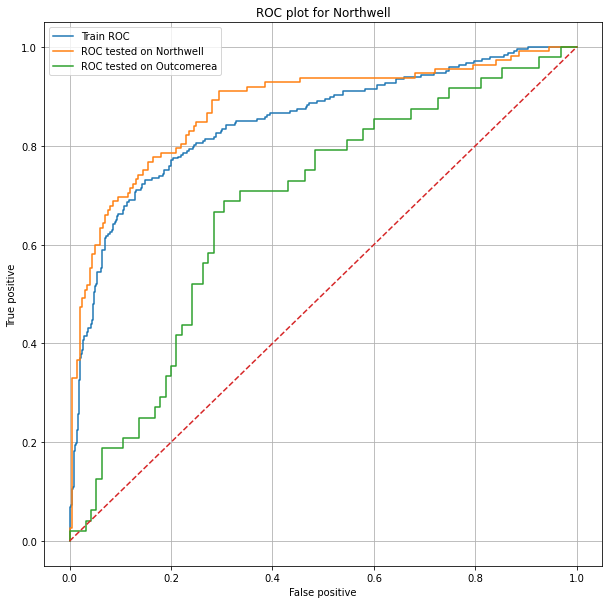

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_n, y_n, test_size=0.3, random_state=42)
y_test_score = svm.decision_function(X_test)
y_train_score = svm.decision_function(X_train)
y_test_score_n = svm.decision_function(X_te_fr)

train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train, y_train_score)
test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test, y_test_score)
test_fpr_fr, test_tpr_fr, te_thresholds_fr = metrics.roc_curve(y_te_fr, y_test_score_n)

plt.grid()
plt.plot(train_fpr,train_tpr, label = "Train ROC")
plt.plot(test_fpr,test_tpr, label = "ROC tested on Northwell")
plt.plot(test_fpr_fr,test_tpr_fr, label = "ROC tested on Outcomerea")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend()
plt.title("ROC plot for Northwell")
plt.xlabel("False positive")
plt.ylabel("True positive")
plt.rcParams["figure.figsize"] = (10,10)
print("AUC for train ROC is %s"%metrics.auc(train_fpr, train_tpr))
print("AUC tested on Northwell is %s"%metrics.auc(test_fpr, test_tpr))
print("AUC tested on Outcomerea is %s"%metrics.auc(test_fpr_fr, test_tpr_fr))

AUC for train ROC is 0.8719462815494669
AUC for test ROC is 0.8867857142857144


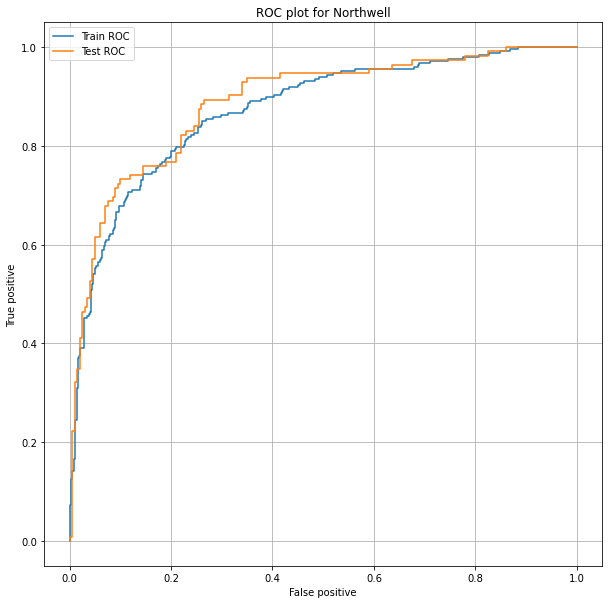

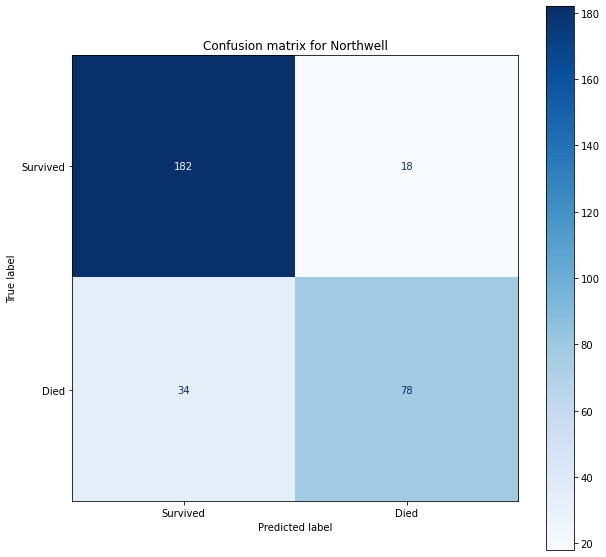

In [21]:
cross_northwell = svm_testing(X_train_n, y_train_n, "Northwell")

AUC for combined is 0.8703316038799911
AUC for combined is 0.8351490336574784
AUC for combined without Tongji is 0.7879296223566447
AUC for combined without Tongji is 0.7883775210964151


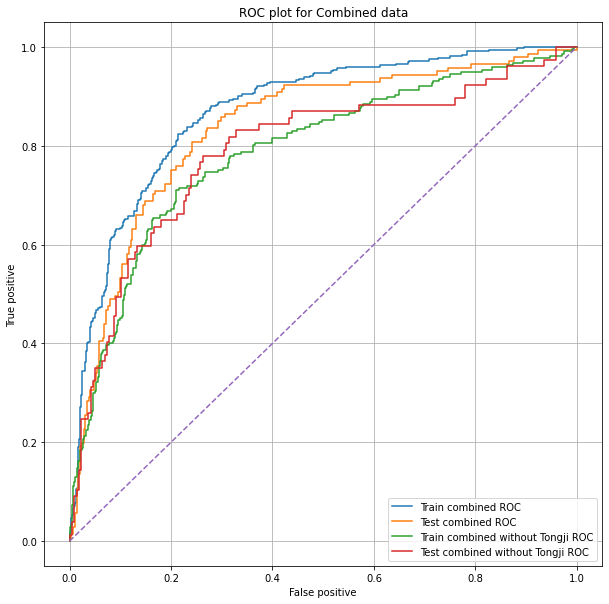

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.3, random_state=42)
svm.fit(X_train, y_train)
y_test_score = svm.decision_function(X_test)
y_train_score = svm.decision_function(X_train)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_w_t, y_w_t, test_size=0.3, random_state=42)
svm.fit(X_train_c, y_train_c)
y_test_score_c = svm.decision_function(X_test_c)
y_train_score_c = svm.decision_function(X_train_c)
train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train, y_train_score)
test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test, y_test_score)
train_fpr_c, train_tpr_c, tr_thresholds_c = metrics.roc_curve(y_train_c, y_train_score_c)
test_fpr_c, test_tpr_c, te_thresholds_c = metrics.roc_curve(y_test_c, y_test_score_c)
plt.grid()
plt.plot(train_fpr,train_tpr, label = "Train combined ROC")
plt.plot(test_fpr,test_tpr, label = "Test combined ROC")
plt.plot(train_fpr_c,train_tpr_c, label = "Train combined without Tongji ROC")
plt.plot(test_fpr_c,test_tpr_c, label = "Test combined without Tongji ROC")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend()
plt.title("ROC plot for Combined data")
plt.xlabel("False positive")
plt.ylabel("True positive")
plt.rcParams["figure.figsize"] = (10,10)
print("AUC for combined is %s"%metrics.auc(train_fpr, train_tpr))
print("AUC for combined is %s"%metrics.auc(test_fpr, test_tpr))
print("AUC for combined without Tongji is %s"%metrics.auc(train_fpr_c, train_tpr_c))
print("AUC for combined without Tongji is %s"%metrics.auc(test_fpr_c, test_tpr_c))

In [10]:
Y = np.array(Tongji_375_data['outcome'])
X = Tongji_375_data.drop(['id', 'admission', 'discharge', 'LDH_first', 'hsCRP_first', 'lymphocytes_first', 'outcome'], axis = 1)

In [15]:
svm = SVC(kernel = 'linear')
svm.fit(X,Y)

SVC(kernel='linear')

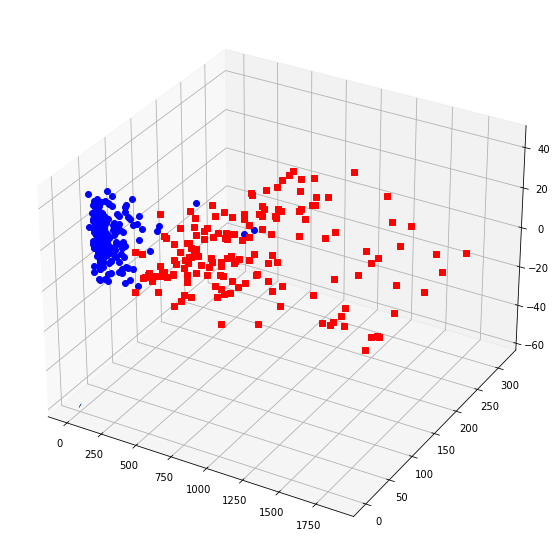

In [66]:
z = lambda x,y: (-svm.intercept_[0]-svm.coef_[0][0]*x-svm.coef_[0][1]*y) / svm.coef_[0][2]

tmp = np.linspace(-2,2,51)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(X[Y==0].iloc[:,0], X[Y==0].iloc[:,1], X[Y==0].iloc[:,2],'ob')
ax.plot3D(X[Y==1].iloc[:,0], X[Y==1].iloc[:,1], X[Y==1].iloc[:,2],'sr')
ax.plot_surface(x, y, z(x,y))
#ax.view_init(0, 180)
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

In [70]:
z(x,y)

array([[-61.28231762, -61.26806947, -61.25382133, ..., -60.59840663,
        -60.58415848, -60.56991033],
       [-61.2644986 , -61.25025045, -61.2360023 , ..., -60.5805876 ,
        -60.56633946, -60.55209131],
       [-61.24667957, -61.23243143, -61.21818328, ..., -60.56276858,
        -60.54852043, -60.53427229],
       ...,
       [-60.42700446, -60.41275632, -60.39850817, ..., -59.74309347,
        -59.72884532, -59.71459718],
       [-60.40918544, -60.39493729, -60.38068915, ..., -59.72527444,
        -59.7110263 , -59.69677815],
       [-60.39136641, -60.37711827, -60.36287012, ..., -59.70745542,
        -59.69320727, -59.67895913]])